In [1]:
%matplotlib inline

In [3]:
import pandas as pd

In [72]:
compras_df=pd.read_csv('data/clean_compras.csv')

In [74]:
compras_df.head()

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
0,110036,"SEMEX,S.A.DE C.V.",SEM680801193,48298-183011-4972,SDU-019-2022,ESTIMACION # 18 PARA EL SUMINISTRO Y APLICACIO...,TR,1029007.0,2023-12-19,3914510.69,GASTOS VARIOS
1,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FZ5592100-183011-5005,SFA-057-2022,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1029028.0,2023-12-19,12474.70,GASTOS VARIOS
2,112917,"TELEFONOS DE MEXICO,S.A.B DE C.V.",TME840315KT6,0V03217-011-183011-6490,NO APLICA,SERVICIO TELEFONICO DE LA DELEGACION IMPUESTO ...,TR,1028981.0,2023-12-15,1282.82,GASTOS VARIOS
3,112917,"TELEFONOS DE MEXICO,S.A.B DE C.V.",TME840315KT6,0F03598-11-183011-6491,NO APLICA,SERVICIO TELEFONICO DEL DIF. CANOAS Y SEGURIDA...,TR,1029062.0,2023-12-21,2723.97,GASTOS VARIOS
4,113290,"CREACIONES EXCLUSIVAS CARYFAM, S.A. DE C.V.",CEC930204HH5,9866-183011-6441,ORDEN DE COMPRA 10540,COMPRA DE PLAYERAS PARA ARBITROS Y COMITE ORGA...,TR,1029036.0,2023-12-19,203580.00,GASTOS VARIOS


# Visión General de Dataset

In [12]:
compras_df.columns

Index(['C B', 'BENEFICIARIO', 'RFC', 'FACTURAS', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO-#OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [14]:
compras_df.dtypes

C B               int64
BENEFICIARIO     object
RFC              object
FACTURAS         object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO-#OP         float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [16]:
compras_df.describe()

,C B,FDO-#OP,IMPORTE
count,2662.000000,2.662000e+03,2.662000e+03
mean,235206.332457,1.875413e+08,5.045489e+05
std,91968.772439,1.754166e+08,3.468079e+06
min,110036.000000,1.028752e+06,5.660000e+00
25%,123140.000000,1.028987e+06,4.084680e+03
50%,311250.000000,3.300012e+08,2.432409e+04
75%,320086.000000,3.540001e+08,1.374901e+05
max,656899.000000,6.040001e+08,1.013855e+08


In [76]:
compras_df=compras_df[['BENEFICIARIO', 'FACTURAS', 'CONTRATO', 'TIPO', 'FECHA', 'IMPORTE', 'SHEET','CONCEPTO']]

In [78]:
compras_df.head()

,BENEFICIARIO,FACTURAS,CONTRATO,TIPO,FECHA,IMPORTE,SHEET,CONCEPTO
0,"SEMEX,S.A.DE C.V.",48298-183011-4972,SDU-019-2022,TR,2023-12-19,3914510.69,GASTOS VARIOS,ESTIMACION # 18 PARA EL SUMINISTRO Y APLICACIO...
1,PRAXAIR MEXICO S. DE R.L. DE C.V.,FZ5592100-183011-5005,SFA-057-2022,TR,2023-12-19,12474.70,GASTOS VARIOS,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC..."
2,"TELEFONOS DE MEXICO,S.A.B DE C.V.",0V03217-011-183011-6490,NO APLICA,TR,2023-12-15,1282.82,GASTOS VARIOS,SERVICIO TELEFONICO DE LA DELEGACION IMPUESTO ...
3,"TELEFONOS DE MEXICO,S.A.B DE C.V.",0F03598-11-183011-6491,NO APLICA,TR,2023-12-21,2723.97,GASTOS VARIOS,SERVICIO TELEFONICO DEL DIF. CANOAS Y SEGURIDA...
4,"CREACIONES EXCLUSIVAS CARYFAM, S.A. DE C.V.",9866-183011-6441,ORDEN DE COMPRA 10540,TR,2023-12-19,203580.00,GASTOS VARIOS,COMPRA DE PLAYERAS PARA ARBITROS Y COMITE ORGA...


# Análisis unidimensional

In [23]:
compras_df['SHEET'].value_counts()

SHEET
CONTRATISTAS     1527
GASTOS VARIOS     560
COMUNICACION      373
PERSONALES        127
SERVICIOS          75
Name: count, dtype: int64

In [25]:
compras_df['SHEET'].unique()

array(['GASTOS VARIOS', 'CONTRATISTAS', 'SERVICIOS', 'COMUNICACION',
       'PERSONALES'], dtype=object)

In [27]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION                                                                                                        536
MUNICIPIO DE LA CIUDAD DE MONTERREY                                                                                                                        55
EDITORA EL SOL, S.A. DE C.V.                                                                                                                               50
MOTO SOLUCIONES MEXICO, S.A. DE C.V.                                                                                                                       50
CAR ONE MONTERREY, S.A. DE C.V.                                                                                                                            44
INTERASFALTOS, S.A. DE C.V.                                                                                                                                43
AUDITORIO INTEGRAL,S.A.DE C.V.         

<Axes: >

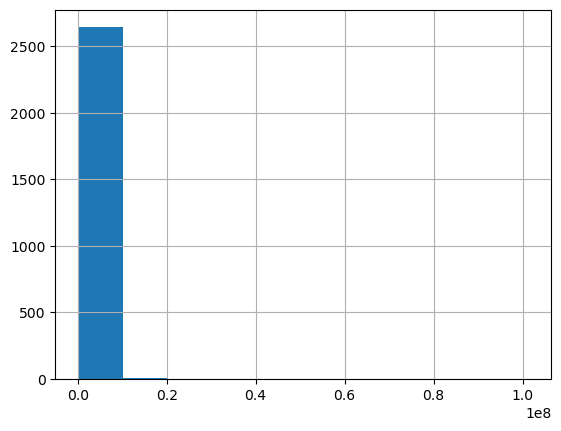

In [31]:
compras_df['IMPORTE'].hist()

<Axes: >

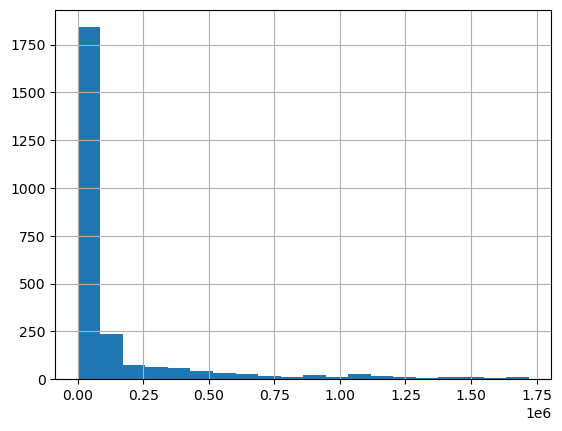

In [33]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=20)

# Análisis Multidimensional

In [38]:
sum_importe_beneficiario=compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

In [40]:
sum_importe_beneficiario.head()

BENEFICIARIO
8ENRED, S DE R.L. DE C.V.                               638000.00
ABUNDIS  ALBERTO                                         47696.25
ACOPIADORA COMERCIAL Y AGROINDUSTRIAL, S.A. DE C.V.     823499.96
ADAME FARIAS ADOLFO                                    1408444.16
ADMON DE PROY Y SERVICIOS EN CONDOMINIO, SC.            149762.63
Name: IMPORTE, dtype: float64

<Axes: xlabel='BENEFICIARIO'>

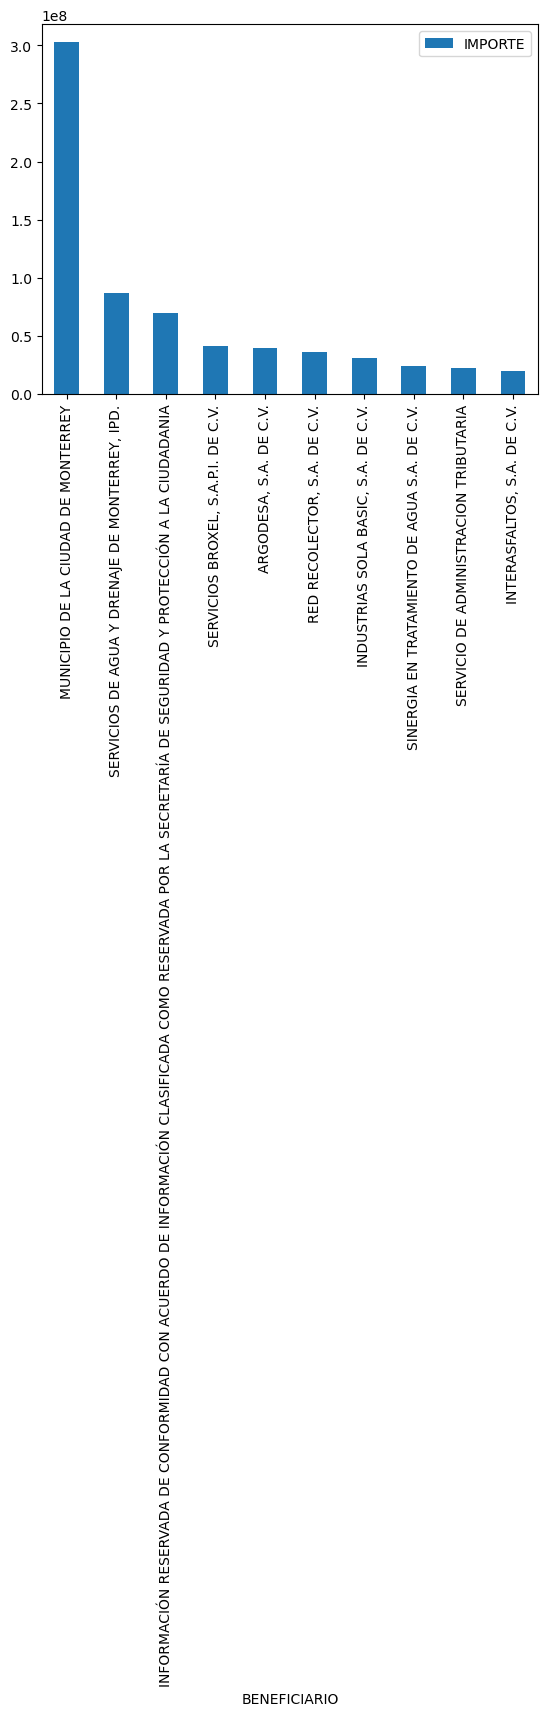

In [44]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar',x='BENEFICIARIO', y='IMPORTE')

In [46]:
mean_importe_sheet=compras_df.groupby('SHEET')['IMPORTE'].mean()

In [48]:
mean_importe_sheet.head()

SHEET
COMUNICACION     9.979830e+04
CONTRATISTAS     4.422806e+05
GASTOS VARIOS    1.041125e+06
PERSONALES       5.124681e+04
SERVICIOS        5.464488e+05
Name: IMPORTE, dtype: float64

<Axes: xlabel='SHEET'>

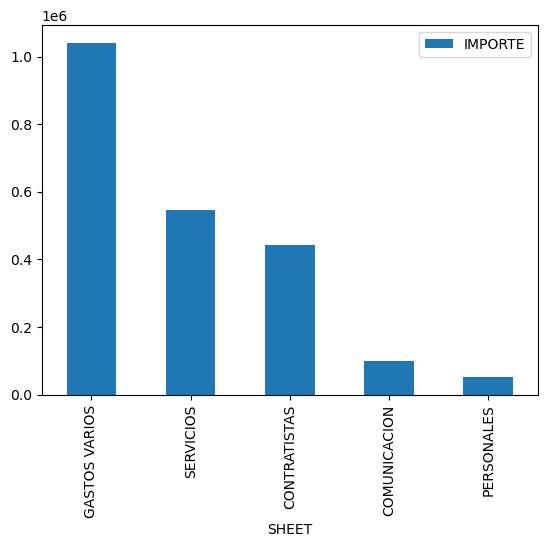

In [50]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar',x='SHEET', y='IMPORTE')

In [54]:
sum_importe_fecha=compras_df.groupby('FECHA').sum()['IMPORTE']

<Axes: xlabel='FECHA'>

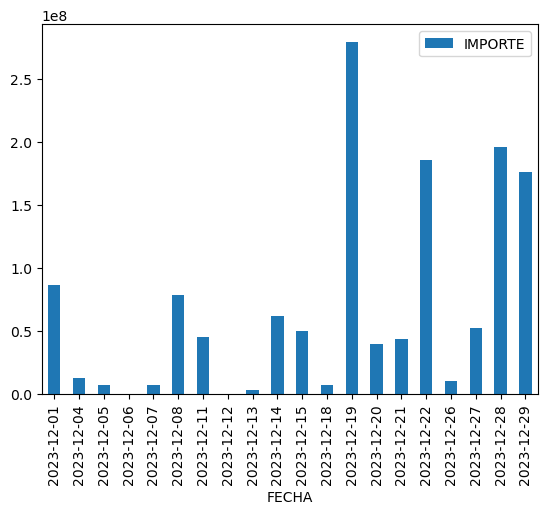

In [58]:
sum_importe_fecha.reset_index().sort_values(by='FECHA', ascending=True).plot(kind='bar',x='FECHA', y='IMPORTE')

# Análisis de texto


In [84]:
import nltk
#nltk.download() Ejecutar si no se tiene descargado nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [104]:
#Ejecutar si no está instalado wordcloud
!pip install wordcloud 

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [108]:
texto_compras=''

In [110]:
for row in compras_df['CONCEPTO']:
    texto_compras=texto_compras+' '+ row

In [112]:
stopwords_list=stopwords.words('spanish')+['2023','cont', 'millar', 'dpp', 'diciembre']

In [118]:
texto_compras=' '.join([x for x in texto_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [122]:
wc=WordCloud(background_color='white')
wc.generate(texto_compras)

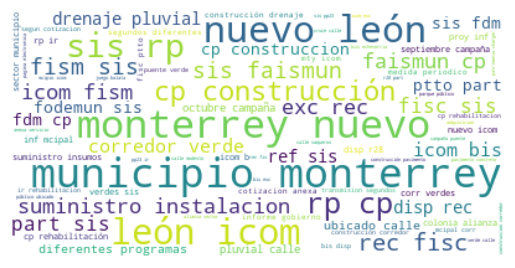

In [126]:
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()